
# 项目：用Python分析tmdb_movies数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

tmdb_movies数据集中包含1万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分和票房。“演职人员 (cast)”、“电影类别 (genres)”等数据列包含由竖线字符（|）分隔的多个数值。对该数据库进行分析，了解拍的最多的电影类别，最受欢迎的电影类别,票房最高的电影排名，票房和评分的关系,作品较多的导演等。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
len(df.id.unique())

10865

In [7]:
df.duplicated().value_counts()

False    10865
True         1
dtype: int64


### 数据清理

数据存在的问题有：
1.数据存在较多缺失数据
2.数据存在重复行
3.部分列数据类型存在问题。
4.部分数据对于我们今天的探索目的无关。

数据修改思路：
1.针对所要探究的问题，删除部分数据列。
2.删除重复行
3.删除存在数据缺失的行。

In [8]:
#删除不需要的数据列
df_movies = df.ix[:,['id','original_title','director','genres','vote_count','vote_average','release_year','budget_adj','revenue_adj']] 
df_movies.head(5)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,id,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
id                10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 764.1+ KB


In [10]:
#删除含有缺失数据的行
df_movies = df_movies.dropna(axis=0)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 9 columns):
id                10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
genres            10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 843.8+ KB


In [11]:
#删除重复数据
df_movies.drop_duplicates(inplace=True)

In [12]:
df_movies.duplicated().value_counts()

False    10800
dtype: int64

<a id='eda'></a>
## 探索性数据分析


### 研究问题 1.评分排名前十的电影是哪些？

In [13]:
#对df_movies根据评分高低进行排序并对十行进行切片。
df_scores = df_movies.sort_values(by='vote_average',ascending=False)
df_top10_scores = df_scores.iloc[:10]
df_top10_scores = df_top10_scores.ix[:,['original_title','vote_average']]
df_top10_scores.reset_index(drop=True)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,original_title,vote_average
0,The Story of Film: An Odyssey,9.2
1,The Mask You Live In,8.9
2,Black Mirror: White Christmas,8.8
3,Life Cycles,8.8
4,Pink Floyd: Pulse,8.7
5,Queen - Rock Montreal,8.5
6,Dave Chappelle: Killin' Them Softly,8.5
7,A Personal Journey with Martin Scorsese Throug...,8.5
8,The Art of Flight,8.5
9,Bill Hicks: Relentless,8.4


### 研究问题 2. 电影评分和票房的关系

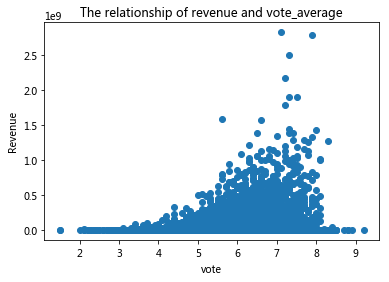

In [14]:
#绘制散点图
plt.scatter(df_movies.vote_average,df_movies.revenue_adj)
plt.title('The relationship of revenue and vote_average')
plt.xlabel('vote')
plt.ylabel('Revenue')
plt.show()

####  结论：可以看出，电影评分和票房有一定的正相关性。电影评分较低的电影，票房也相对较差。但对于评分较高的电影，票房不一定高，票房受很多因素的影响。另一方面，该评分很多电影参与评分人数太少，电影评分代表性不够高。

### 研究问题 3.电影数量和年度总票房随年份的变化。

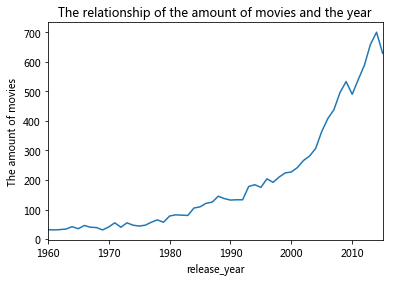

In [15]:
#绘制折线图，观察趋势
df.groupby('release_year')['id'].count().plot()
plt.title('The relationship of the amount of movies and the year')
plt.ylabel('The amount of movies')
plt.show()

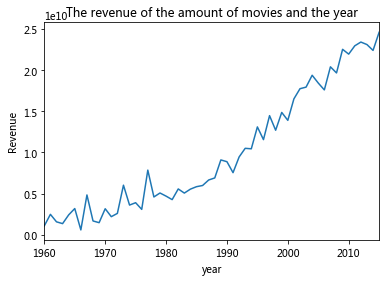

In [16]:
#绘制折线图，观察趋势
df_movies['revenue_adj'].groupby(df_movies['release_year']).sum().plot(kind='line')
plt.title('The revenue of the amount of movies and the year')
plt.xlabel('year')
plt.ylabel('Revenue')
plt.show()

#### 结论：从上面两个图可以看出，随着年份的增加，每年上映的电影数量也在增长，年度总票房持续增长，说明电影行业逐年繁荣。

### 研究问题 4.作品最多的导演排名

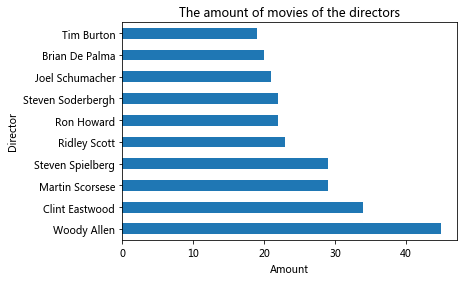

In [17]:
#绘制柱状图
df_movies.director.value_counts(ascending=False).head(10).plot.barh()
plt.title('The amount of movies of the directors')
plt.xlabel('Amount')
plt.ylabel('Director')
plt.show()

#### 结论：根据上图我们可以知道，Woody Allen在这些年导演的电影数最多，能有如此大的出品电影数，可见导演影响力也足够高。

### 研究问题 5.这些年什么类型的电影最多？票房较高的电影类型是什么？

In [18]:
#取出genres一列，对其进行拆分
df_genres = df_movies.genres.dropna().str.split('|').apply(pd.value_counts)

In [19]:
df_moives_genres = df_genres.unstack().dropna().reset_index()

In [20]:
df_moives_genres.head()

,level_0,level_1,0
0,Action,0,1.0
1,Action,1,1.0
2,Action,3,1.0
3,Action,4,1.0
4,Action,6,1.0


In [21]:
#取出拆分后的数据并生成一个list
df_genres1=df_moives_genres.level_0.values.tolist()

In [22]:
#词频计算
from collections import Counter
Counter(df_genres1)

Counter({'Action': 2378,
         'Adventure': 1466,
         'Animation': 692,
         'Comedy': 3782,
         'Crime': 1353,
         'Documentary': 509,
         'Drama': 4754,
         'Family': 1223,
         'Fantasy': 912,
         'Foreign': 185,
         'History': 332,
         'Horror': 1636,
         'Music': 402,
         'Mystery': 809,
         'Romance': 1708,
         'Science Fiction': 1223,
         'TV Movie': 162,
         'Thriller': 2904,
         'War': 270,
         'Western': 164})

In [23]:
#将list写入一个文本中
genres=open('genre.txt','w')
for i in df_genres1:
    genres.write(i)
    genres.write(',')
genres.close()

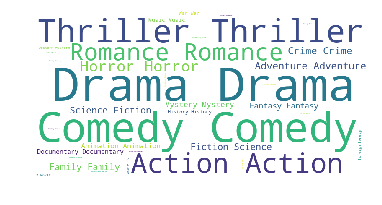

In [24]:
#绘制词云图
from wordcloud import WordCloud
with open('genre.txt','r') as f:
    text = f.read()
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### 结论：由频数计算和可视化图形可看出，这些年来，Drama,Comedy,Action,Thriller类型的电影产量较高。

In [25]:
#根据票房一列对清洗过后的数据进行排序
df_revenue = df_movies.sort_values(by='revenue_adj',ascending=False)

In [26]:
#取出票房前20名的电影
df_top20_revenue=df_revenue.iloc[:20]

In [27]:
#取出票房前20名的电影类型
df_genres_top20 = df_top20_revenue.genres.dropna().str.split('|').apply(pd.value_counts)
df_moives_genres20 = df_genres_top20.unstack().dropna().reset_index()

In [28]:
df_genres2=df_moives_genres20.level_0.values.tolist()
from collections import Counter
Counter(df_genres2)

Counter({'Action': 11,
         'Adventure': 15,
         'Animation': 2,
         'Comedy': 1,
         'Crime': 3,
         'Drama': 4,
         'Family': 4,
         'Fantasy': 5,
         'Horror': 2,
         'Mystery': 1,
         'Romance': 1,
         'Science Fiction': 10,
         'Thriller': 6})

In [29]:
top20_genres = dict(Counter(df_genres2))

In [30]:
top20_genres.keys()

dict_keys(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Science Fiction', 'Thriller'])

In [31]:
x=list(top20_genres.keys())

In [32]:
y=list(top20_genres.values())

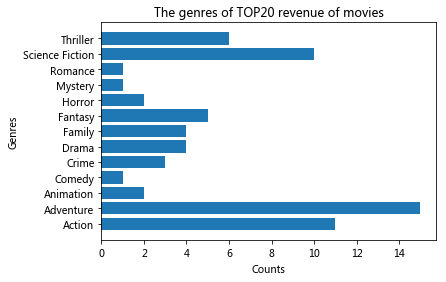

In [33]:
#因类型数较少，可绘制柱状图
plt.barh(range(len(x)),y,tick_label=x)
plt.title('The genres of TOP20 revenue of movies')
plt.xlabel('Counts')
plt.ylabel('Genres')

#### 结论：票房前20的电影中，反而Science Fiction和Adventure的比例较大，说明Science Fiction和Adventure的电影比较受欢迎。而这些年来，Drama,Comedy,Action,Thriller类型的电影产量更高，说明电影市场可以调整电影种类，适当增加Science Fiction和Adventure的电影数量。

<a id='conclusions'></a>
## 结论

### 1.这些年电影市场逐渐繁荣，每年票房大致呈逐渐升高趋势，电影数量总体逐年增加。
### 2.电影的票房和电影评分有着一定的正相关关系。评分低的电影一般票房也相对较低。不过票房由多种因素决定，评分高并不一定卖座率也高。
### 3.Drama,Comedy,Action,Thriller类型的电影上映的较多。分析票房前20名的电影类型，Science Fiction和Adventure受欢迎度更高。电影市场可以调整电影种类，适当增加Science Fiction和Adventure的电影数量，以获取更高的票房收入。
### 4.有很多优秀的导演和演员为电影事业做出来很大的贡献，Woody Allen是最高产的导演，共拍摄了45部电影。

## 限制
### 分析中依旧存在一些限制，导致得出的结论并不一定完全准确，存在的限制有以下几点：
### 1.由于部分行存在数据缺失的情况，我们直接删除了该行，导致缺失了某部分数据。原数据有10866行，删除后只留下了10801行，这就可能导致部分结论存在错误的情况，比如说如果删除了票房高的某些影片，就可能导致我们得到的票房前20名的电影类型结论存在误差。这对于我们高产导演的结论也有所影响。
### 2.提供的关于电影评分的数据，某些电影参与投票的人数太少，导致电影评分数据准确度不够高，所以可能影响我们对于电影票房和电影评分关系结论的准确度。
### 3.在数据去重的时候，我只去除了两行数据一样的电影，不过探索中也发现有些电影名字出现了多次，这种情况没有具体考虑。这也可能是重复数据。考虑到可能是多次上映的因素，就保留了。说明在数据处理的时候也存在一些个人理解误差。可能会影响结论的准确性。




